In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
from sklearn.preprocessing import minmax_scale
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from tensorflow.keras.metrics import mean_absolute_percentage_error
#import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML,display

In [56]:
df = pd.read_csv("./data.csv", parse_dates=['dt'],index_col=0)
df.head()

,MW
dt,
2011-01-01 00:00:00,3416.0
2011-01-01 00:15:00,4755.0
2011-01-01 00:30:00,4939.0
2011-01-01 00:45:00,4939.0
2011-01-01 01:00:00,4998.0


In [57]:


#renaming the column to MW
df.columns=['power']
df.head()



,power
dt,
2011-01-01 00:00:00,3416.0
2011-01-01 00:15:00,4755.0
2011-01-01 00:30:00,4939.0
2011-01-01 00:45:00,4939.0
2011-01-01 01:00:00,4998.0


In [58]:


start_date=pd.to_datetime('2021-11-01')
new_df=df[start_date:]
new_df.head()



,power
dt,
2021-11-01 00:00:00,12986.92
2021-11-01 00:15:00,6449.50
2021-11-01 00:30:00,6438.13
2021-11-01 00:45:00,6341.37
2021-11-01 01:00:00,6371.73


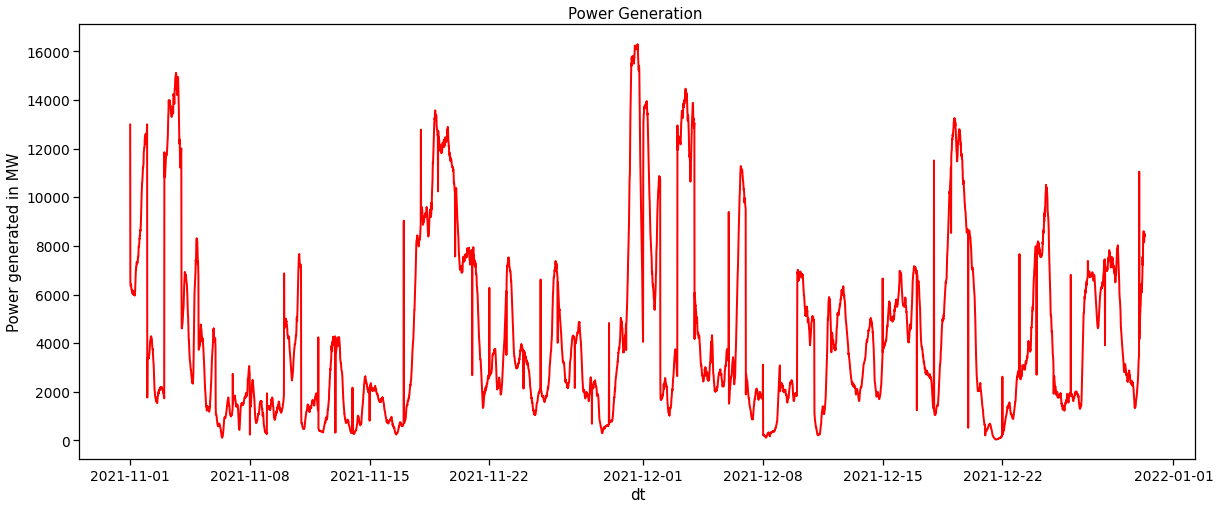

In [59]:


plt.figure(figsize=(20,8))
sns.lineplot(data=new_df,x=new_df.index,y='power',color='red',lw=2,)
plt.ylabel("Power generated in MW")
plt.title("Power Generation ");



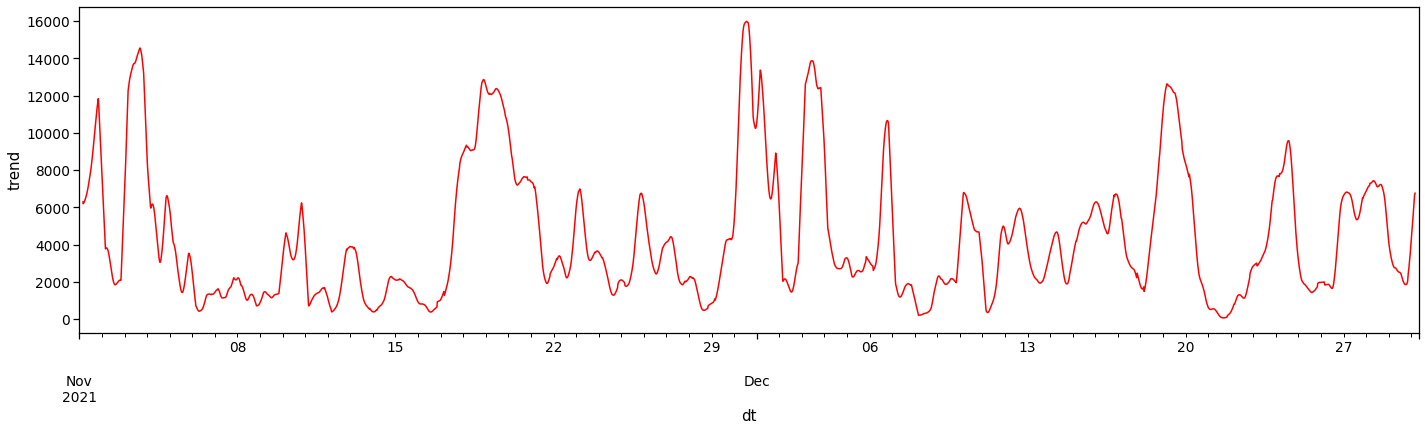

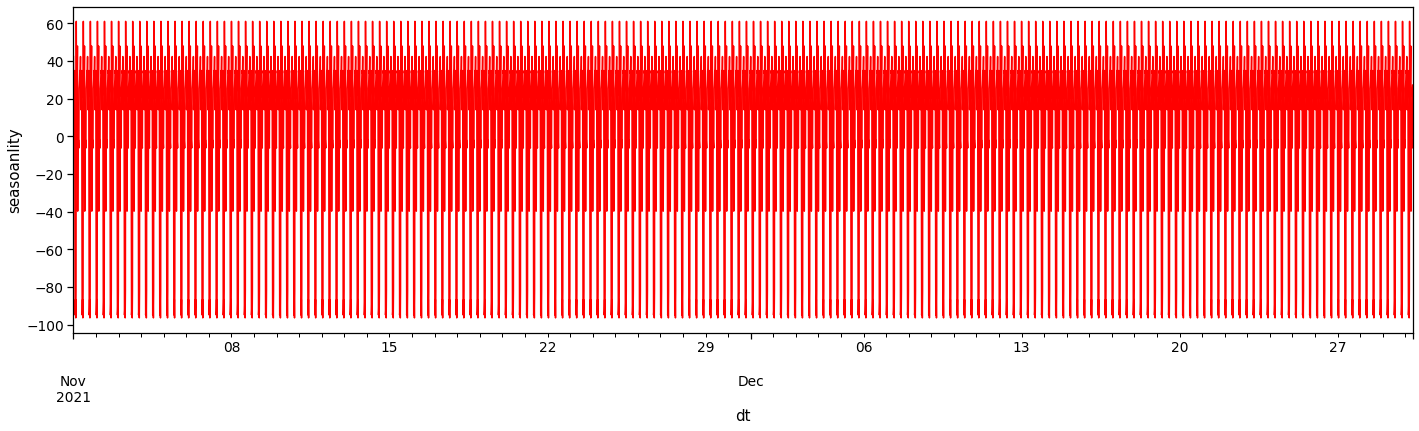

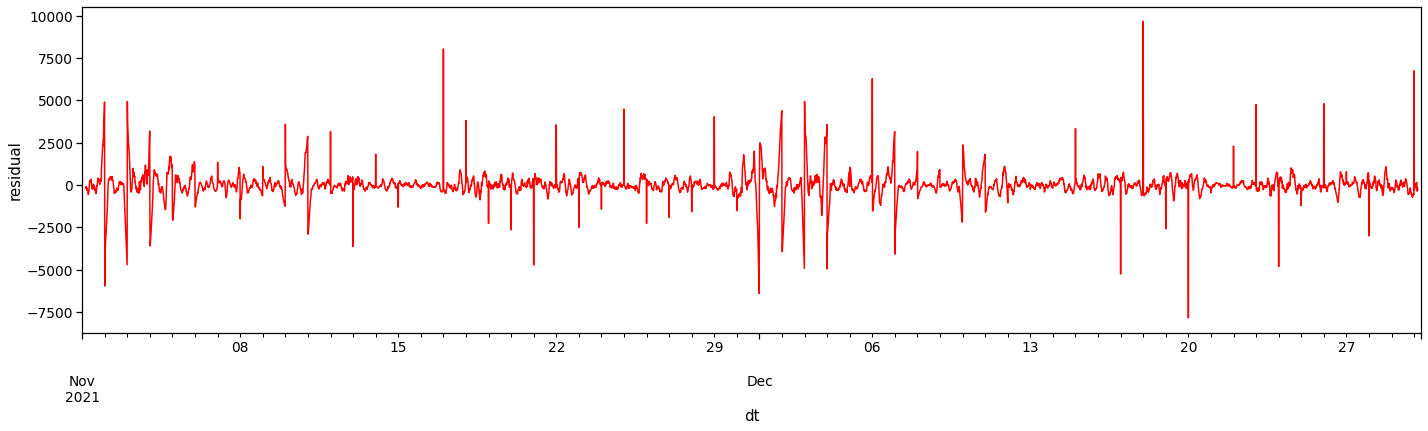

In [60]:


res = seasonal_decompose(new_df, model = "additive",period = 30)
plt.figure(figsize=(24,6))
display(HTML("<span style='background-color:#16A085;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #16A085;padding:0px 20px'>Trend</span>"))
res.trend.plot(ylabel = "trend",color='red');
plt.show()

plt.figure(figsize=(24,6))
display(HTML("<span style='background-color:#16A085;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #16A085;padding:0px 20px'>Seasonality</span>"))
res.seasonal.plot(ylabel = "seasoanlity",color='red')
plt.show()

plt.figure(figsize=(24,6))
display(HTML("<span style='background-color:#16A085;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #16A085;padding:0px 20px'>Residuals</span>"))
res.resid.plot(ylabel = "residual",color='red')
plt.show()



In [61]:
day_to_observe=pd.to_datetime('2021-12-01')
next_day=day_to_observe+pd.offsets.Day(1)
next_day


Timestamp('2021-12-02 00:00:00')

In [62]:


one_day_df=new_df[day_to_observe:next_day-pd.Timedelta("15min")]
one_day_df.head()



,power
dt,
2021-12-01 00:00:00,10712.41
2021-12-01 00:15:00,13036.81
2021-12-01 00:30:00,13278.28
2021-12-01 00:45:00,13410.89
2021-12-01 01:00:00,13435.42


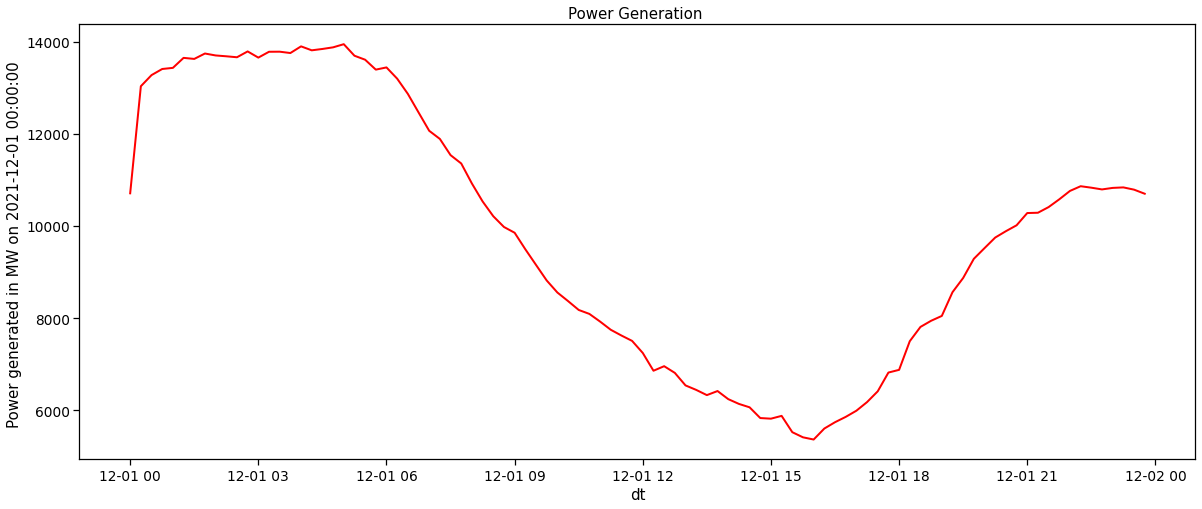

In [63]:
plt.figure(figsize=(20,8))
sns.lineplot(data=one_day_df,x=one_day_df.index,y='power',lw=2,color='red')
plt.ylabel(f"Power generated in MW on {day_to_observe} ")
plt.title("Power Generation ");


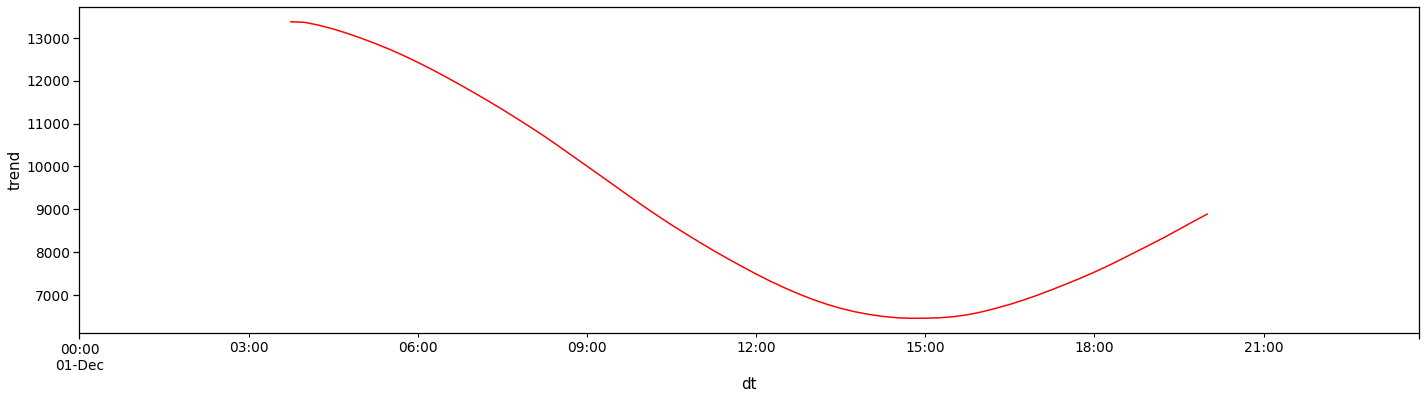

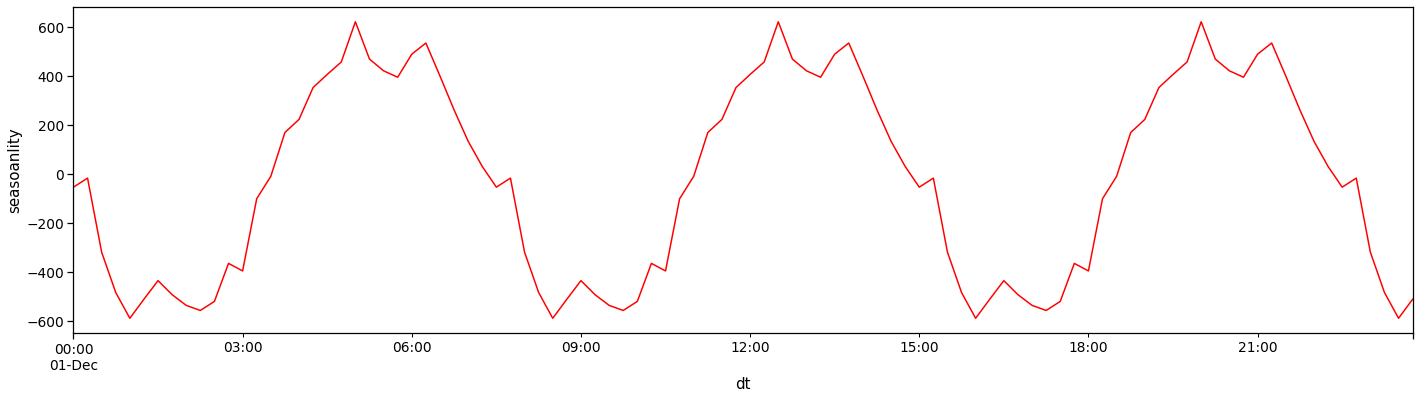

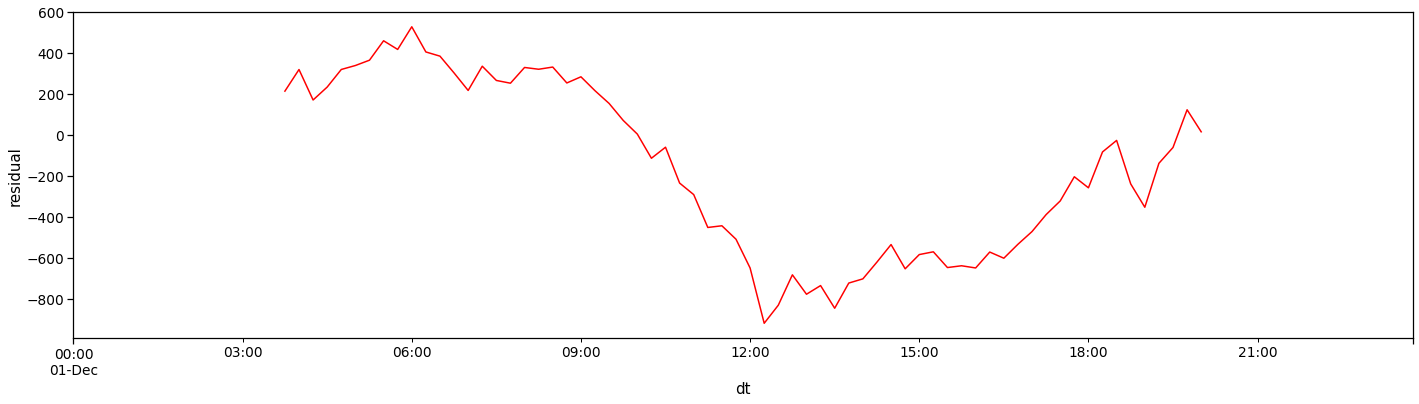

In [64]:
res = seasonal_decompose(one_day_df, model = "additive",period = 30)

plt.figure(figsize=(24,6))
display(HTML("<span style='background-color:#16A085;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #16A085;padding:0px 20px'>Trend</span>"))
res.trend.plot(ylabel = "trend",color='red');
plt.show()

plt.figure(figsize=(24,6))
display(HTML("<span style='background-color:#16A085;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #16A085;padding:0px 20px'>Seasonality</span>"))
res.seasonal.plot(ylabel = "seasoanlity",color='red')
plt.show()

plt.figure(figsize=(24,6))
display(HTML("<span style='background-color:#16A085;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #16A085;padding:0px 20px'>Residuals</span>"))
res.resid.plot(ylabel = "residual",color='red')
plt.show()

In [65]:
new_df['first_diff']=new_df['power'].diff(periods=1)

In [66]:


def adf_test(timeseries):
    print("Results of Augmented Dickey-fuller test")
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key]= value
    print(dfoutput)



In [53]:
adf_test(new_df.first_diff.dropna())


Results of Augmented Dickey-fuller test
Test Statistic                  -21.422791
p-value                           0.000000
#lags used                        9.000000
number of observations used    5685.000000
critical value (1%)              -3.431501
critical value (5%)              -2.862049
critical value (10%)             -2.567041
dtype: float64


In [54]:


def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)



In [19]:


kpss_test(new_df.first_diff.dropna())



Results of KPSS Test:
Test Statistic           0.043607
p-value                  0.100000
#Lags Used               5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


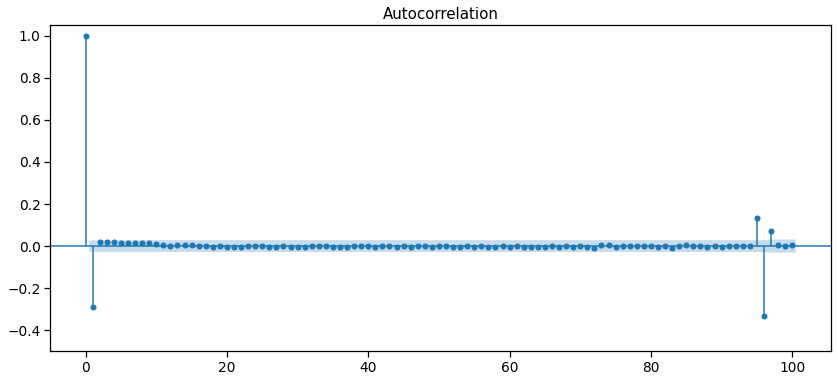

In [20]:


fig,ax=plt.subplots(figsize=(14,6))
plot_acf(new_df.first_diff.dropna(),ax=ax,lags=100);
plt.ylim([-0.5,1.05]);



In [21]:


new_df.index[0],new_df.index[-1],new_df.shape[0]



(Timestamp('2021-11-01 00:00:00'), Timestamp('2021-12-30 07:45:00'), 5696)

In [22]:


len(pd.date_range(start=pd.to_datetime('2021-11-01 00:00:00'),end=pd.to_datetime('2021-12-30 07:45:00'),freq='15min'))



5696

In [23]:


new_df.index=pd.date_range(start=pd.to_datetime('2021-11-01 00:00:00'),end=pd.to_datetime('2021-12-30 07:45:00'),freq='15min')
new_df.index[:6]



DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 00:15:00',
               '2021-11-01 00:30:00', '2021-11-01 00:45:00',
               '2021-11-01 01:00:00', '2021-11-01 01:15:00'],
              dtype='datetime64[ns]', freq='15T')

In [24]:


train_end=pd.to_datetime('2021-12-26')-pd.Timedelta("15min")
train_end



Timestamp('2021-12-25 23:45:00')

In [25]:
train_data=new_df[:train_end]
test_data=new_df[train_end+pd.Timedelta("15min"):]
test_data.head()

,power,first_diff
2021-12-26 00:00:00,6806.12,4916.81
2021-12-26 00:15:00,1998.78,-4807.34
2021-12-26 00:30:00,1850.48,-148.30
2021-12-26 00:45:00,1844.30,-6.18
2021-12-26 01:00:00,1909.84,65.54


In [26]:


len(train_data),len(test_data)



(5280, 416)

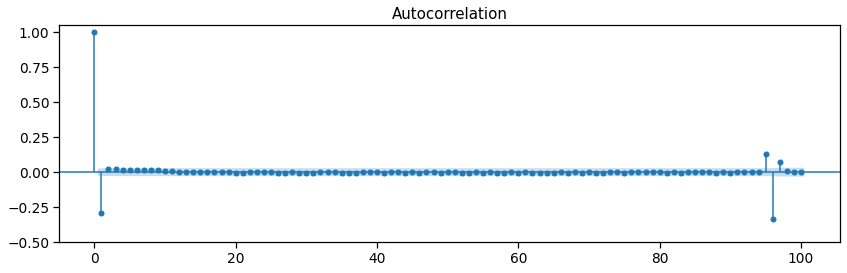

In [27]:


fig,ax=plt.subplots(figsize=(14,4))
plot_acf(new_df.first_diff.dropna(),ax=ax,lags=100);
plt.ylim([-0.5,1.05]);



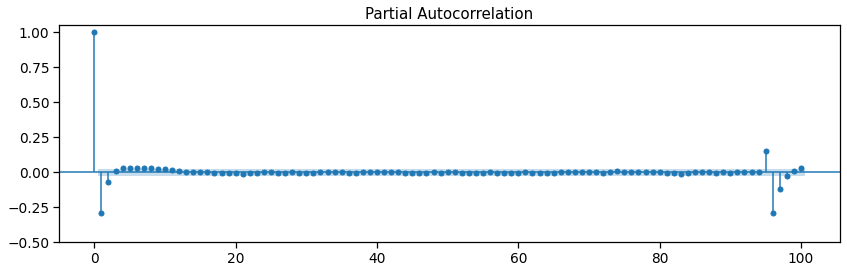

In [28]:


fig,ax=plt.subplots(figsize=(14,4))
plot_pacf(new_df.first_diff.dropna(),ax=ax,lags=100);
plt.ylim([-0.5,1.05]);



In [29]:


model=ARIMA(train_data.power,order=(1,1,1)).fit()

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  power   No. Observations:                 5280
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -41150.058
Date:                Tue, 25 Oct 2022   AIC                          82306.117
Time:                        13:30:50   BIC                          82325.831
Sample:                    11-01-2021   HQIC                         82313.007
                         - 12-25-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1241      0.025     -4.915      0.000      -0.174      -0.075
ma.L1         -0.1776      0.026     -6.868      0.000      -0.228      -0.127
sigma2      3.394e+05    792.738    428.187      0.000    3.38e+05    3.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):           4394824.68
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                       144.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:


#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]



In [31]:
#making the predictions 
predictions = model.predict(start=pred_start_date, end=pred_end_date)


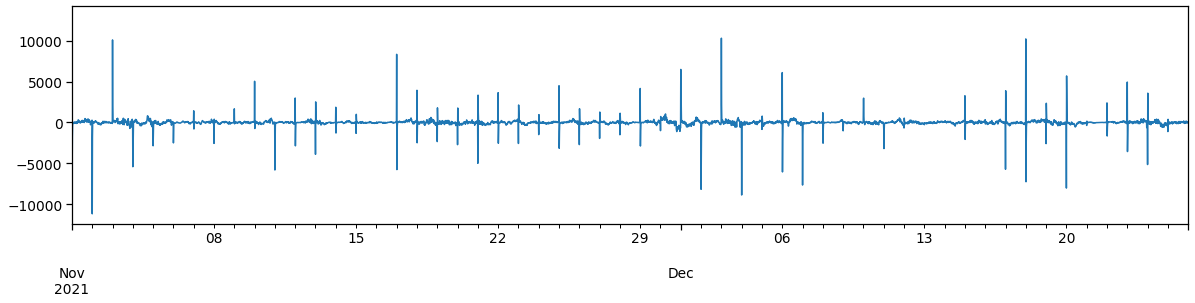

In [32]:
# computing the residuals
residuals = test_data.power - predictions

fig,ax=plt.subplots(figsize=(20,4))
model.resid.plot(ax=ax);

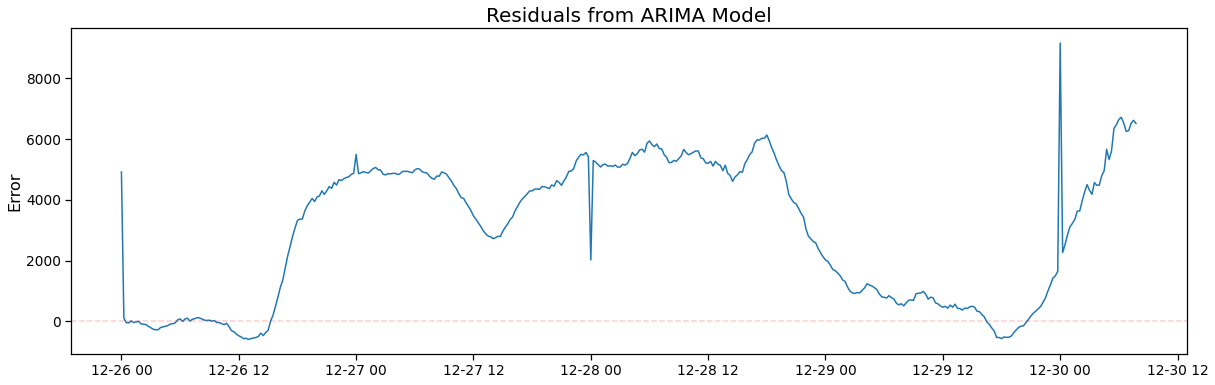

In [33]:


plt.figure(figsize=(20,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2);



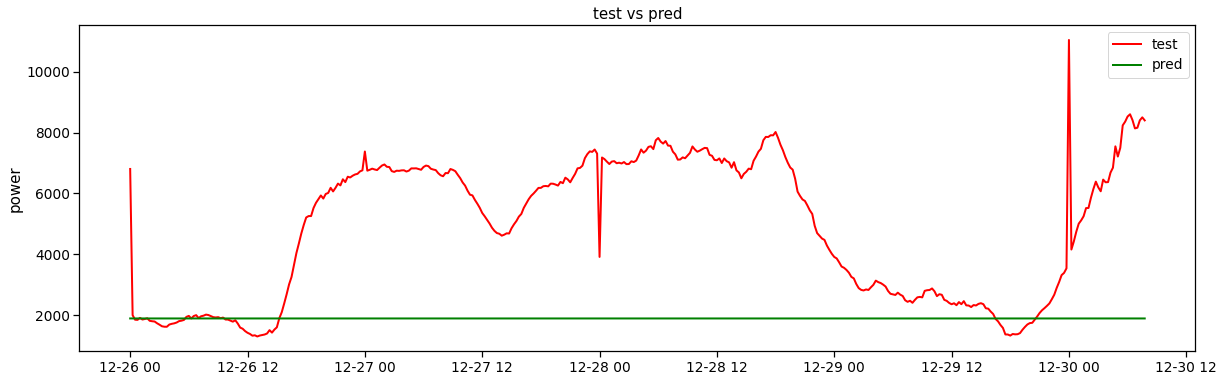

In [34]:


plt.figure(figsize=(20,6))
sns.lineplot(data=test_data,x=test_data.index,y=test_data.power,lw=2,color='red')
sns.lineplot(x=predictions.index,y=predictions.values,lw=2,color='green')
plt.title("test vs pred")
plt.legend(['test','pred']);



In [35]:


mape=mean_absolute_percentage_error(tf.constant(test_data.power),tf.constant(predictions)).numpy()
display(HTML("<h2>"+f'The mean absolute percentage error:{mape:.2f}'+"</h2>"))



NameError: name 'mean_absolute_percentage_error' is not defined

In [36]:


predictions_rolling=pd.Series(dtype=np.float64)
for end_date in test_data.index:
    train_data=new_df[:end_date-pd.Timedelta("15min")]
    model=ARIMA(train_data.power,order=(1,1,1)).fit()
    pred=model.predict(end_date)
    predictions_rolling[end_date]=pred[end_date]



In [37]:
rolling_residuals=test_data.power-predictions_rolling
rolling_residuals[:2]

2021-12-26 00:00:00    4914.454338
2021-12-26 00:15:00   -3323.750314
Freq: 15T, dtype: float64

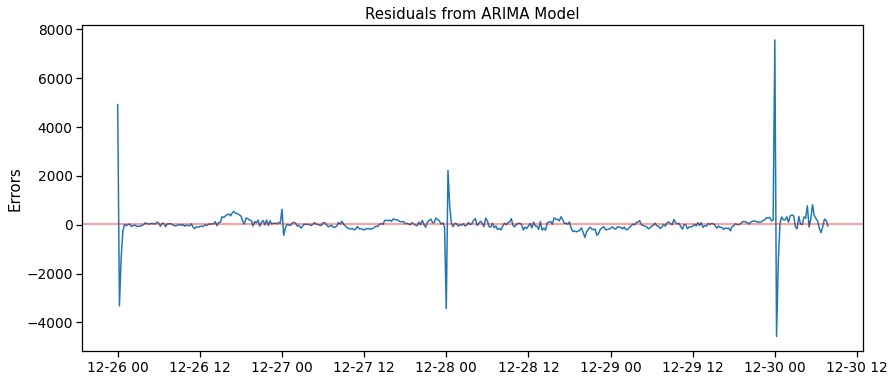

In [38]:


plt.figure(figsize=(14,6))
plt.plot(rolling_residuals)
plt.axhline(rolling_residuals.mean(),color='r',alpha=0.5,label='mean')
plt.title("Residuals from ARIMA Model");
plt.ylabel("Errors");



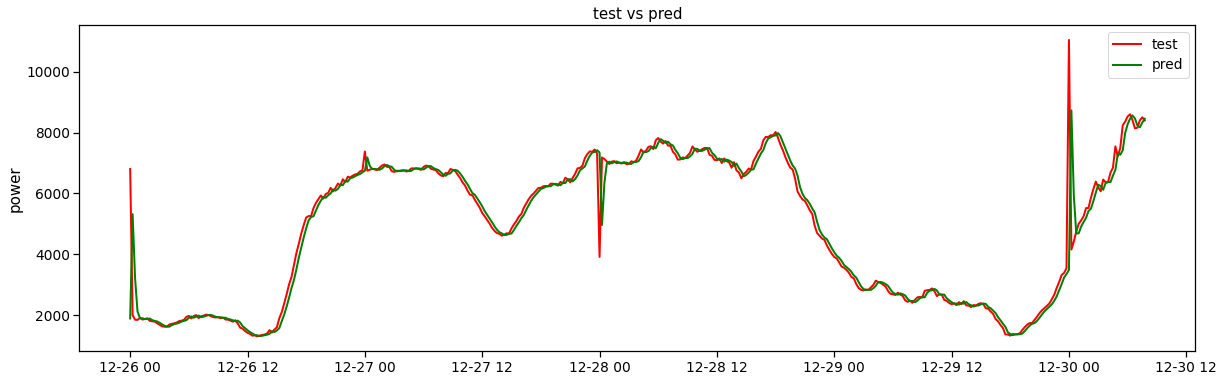

In [39]:


plt.figure(figsize=(20,6))
sns.lineplot(data=test_data,x=test_data.index,y=test_data.power,lw=2,color='red')
sns.lineplot(x=predictions_rolling.index,y=predictions_rolling.values,lw=2,color='green')
plt.title("test vs pred")
plt.legend(['test','pred']);



In [40]:


mape=mean_absolute_percentage_error(tf.constant(test_data.power),tf.constant(predictions_rolling)).numpy()
display(HTML("<h2>"+f'The mean absolute percentage error:{mape:.2f}'+"</h2>"))



NameError: name 'mean_absolute_percentage_error' is not defined